In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage.morphology import skeletonize, thin
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

**TODO**  
- Descubrir cómo marcar los contornos interiores  
- Comprobar si puedo contar el perímetro del skeleton sin findContours

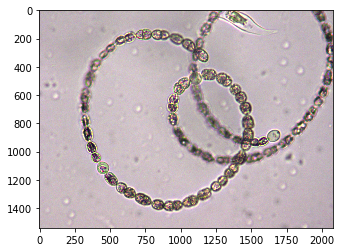

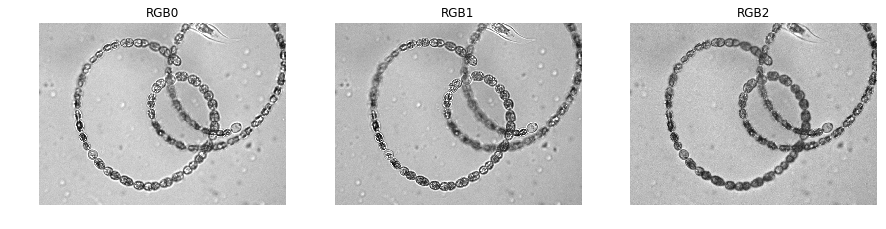

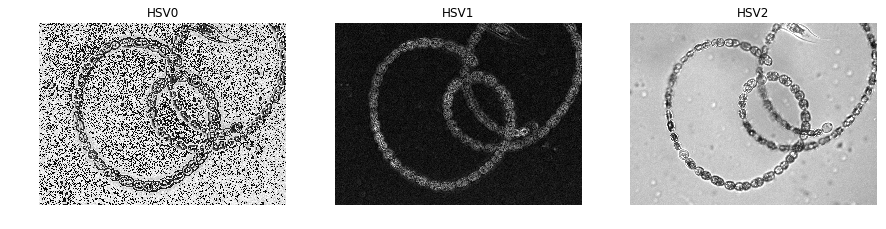

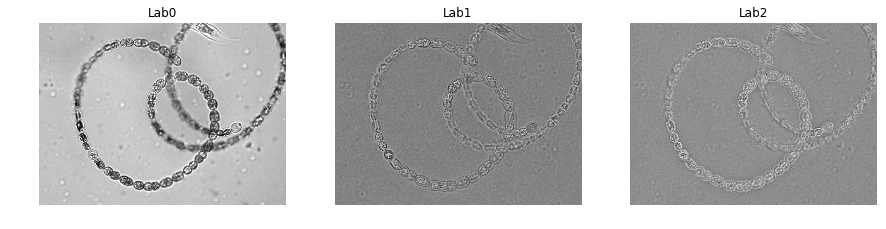

In [2]:
im = cv2.imread('dataset/Single 40x - Anabaena spiroides 1.jpg')
# im = cv2.imread('dataset/Single 40x - Anabaena spiroides 2.jpg')
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
im_lab = cv2.cvtColor(im, cv2.COLOR_BGR2Lab)

images = [im_rgb, im_hsv, im_lab]
names = ['RGB', 'HSV', 'Lab']
for n, img in enumerate(images):
    fig, axeslist = plt.subplots(ncols=3, nrows=1,figsize=(15,15))
    for i in range(3):
        axeslist.ravel()[i].imshow(img[:,:,i], cmap='gray')
        axeslist.ravel()[i].set_title(names[n] + str(i))
        axeslist.ravel()[i].set_axis_off()
    plt.show()

In [3]:
img = im_lab[:,:,0]

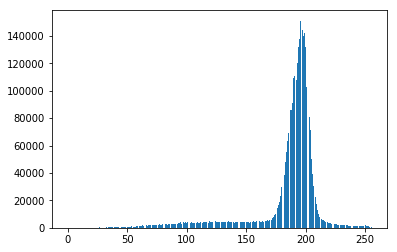

In [4]:
hist, _ = np.histogram(img, 256, [0, 256])
plt.bar(range(0,256), hist)
plt.show()

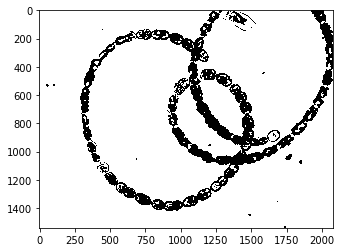

In [5]:
blur = cv2.GaussianBlur(img,(11,11),0)
ret,thresh = cv2.threshold(blur,160,255,0)
plt.imshow(thresh, cmap='gray')
plt.show()

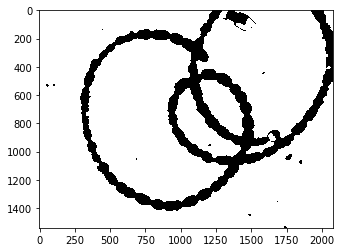

In [6]:
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(closing, cmap='gray')
plt.show()

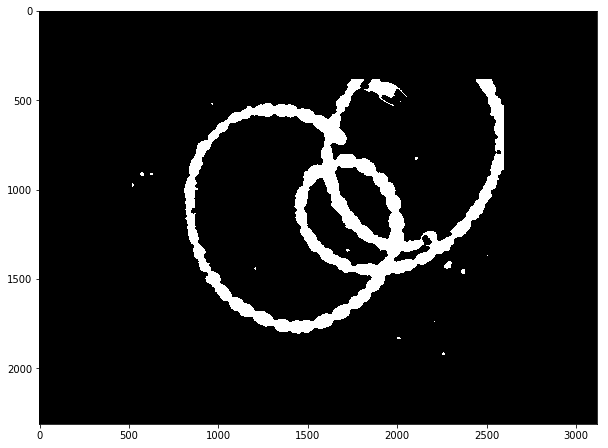

In [93]:
newimage = np.ones((int(closing.shape[0]*1.5), int(closing.shape[1]*1.5))) * 255
newimage[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)] = closing
plt.figure(figsize=(10,8))
plt.imshow(255-newimage, cmap='gray')
plt.show()

In [8]:
# from skimage import measure

In [9]:
# np.unique(labeled)

In [10]:
# labeled = measure.label(newimage, background=255)
# plt.figure(figsize=(10,8))
# plt.imshow(labeled)
# plt.show()

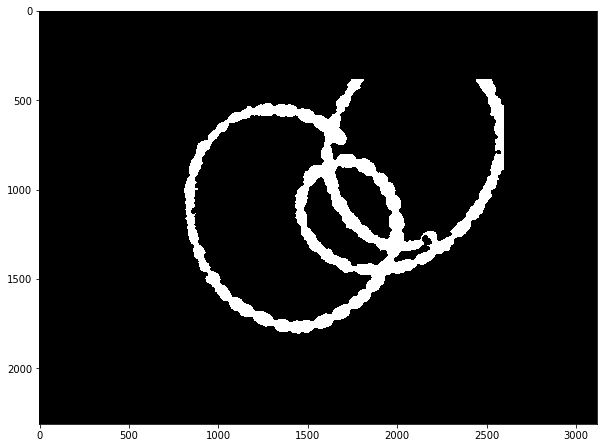

In [90]:
# _, contours, hierarchy = cv2.findContours(newimage.astype(int),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
_, contours, hierarchy = cv2.findContours(((255-newimage)/255.0).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 

contours.sort(key=cv2.contourArea, reverse=True)
mask = np.zeros(newimage.shape,np.uint8)
cv2.drawContours(mask,contours,0,(255,255,255), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
# for i in range(hierarchy.shape[1]):
#     if hierarchy[0][i][3] != -1:
#         cv2.drawContours(mask,contours,i,(255,255,255), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
for i in range(1,hierarchy.shape[1]):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(mask,contours,i,(0,0,0), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)

# cv2.drawContours(mask,contours[:],-1,(255,255,255), thickness=3)
# cv2.drawContours(mask,contours,0,(255,255,255), thickness=3, lineType=8, hierarchy=hierarchy, maxLevel=0)
# cv2.drawContours(mask,contours,3,(0,0,0), thickness=-1, lineType=8, hierarchy=hierarchy)
# cv2.drawContours(mask,contours,5,(0,0,0), thickness=-1, lineType=8, hierarchy=hierarchy)
# cv2.drawContours(mask,contours,7,(0,0,0), thickness=-1, lineType=8, hierarchy=hierarchy)
# cv2.drawContours(mask,[contours[1]],-1,(255,255,255), thickness=1)
# cv2.fillPoly(mask, pts=contours[0], color=(255,255,255))
plt.figure(figsize=(10,8))
plt.imshow(mask, cmap='gray')
plt.show()

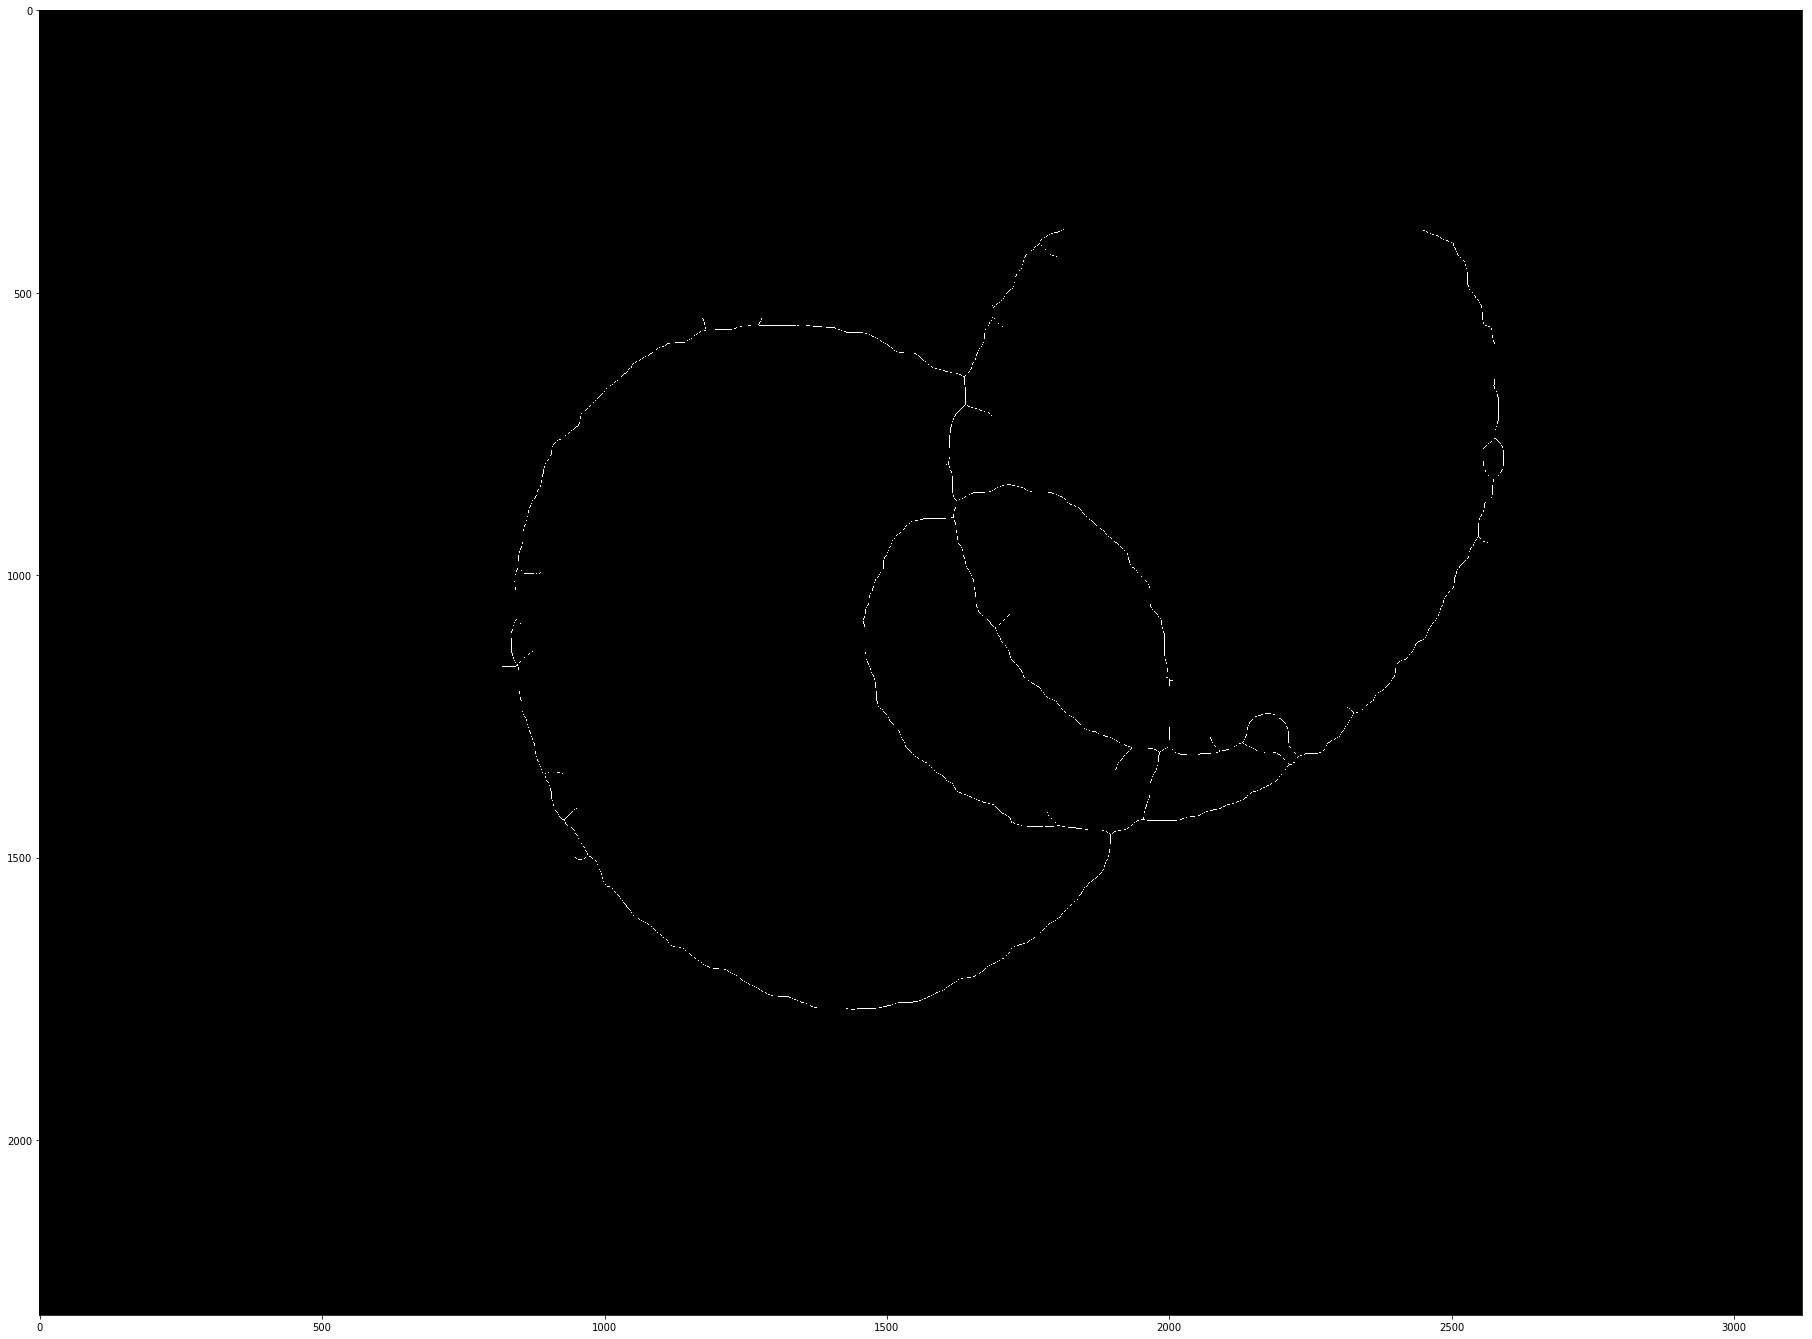

In [91]:
# perform skeletonization
# skeleton = skeletonize(image/255)
skeleton = skeletonize(mask/255)
cv2.imwrite('skeleton.png',np.uint8(skeleton)*255)
# thinned = thin(mask/255)
plt.figure(figsize=(40,24))
# plt.figure(figsize=(40,24))
plt.imshow(skeleton, cmap='gray',interpolation="nearest")
plt.show()

8360.822292089462


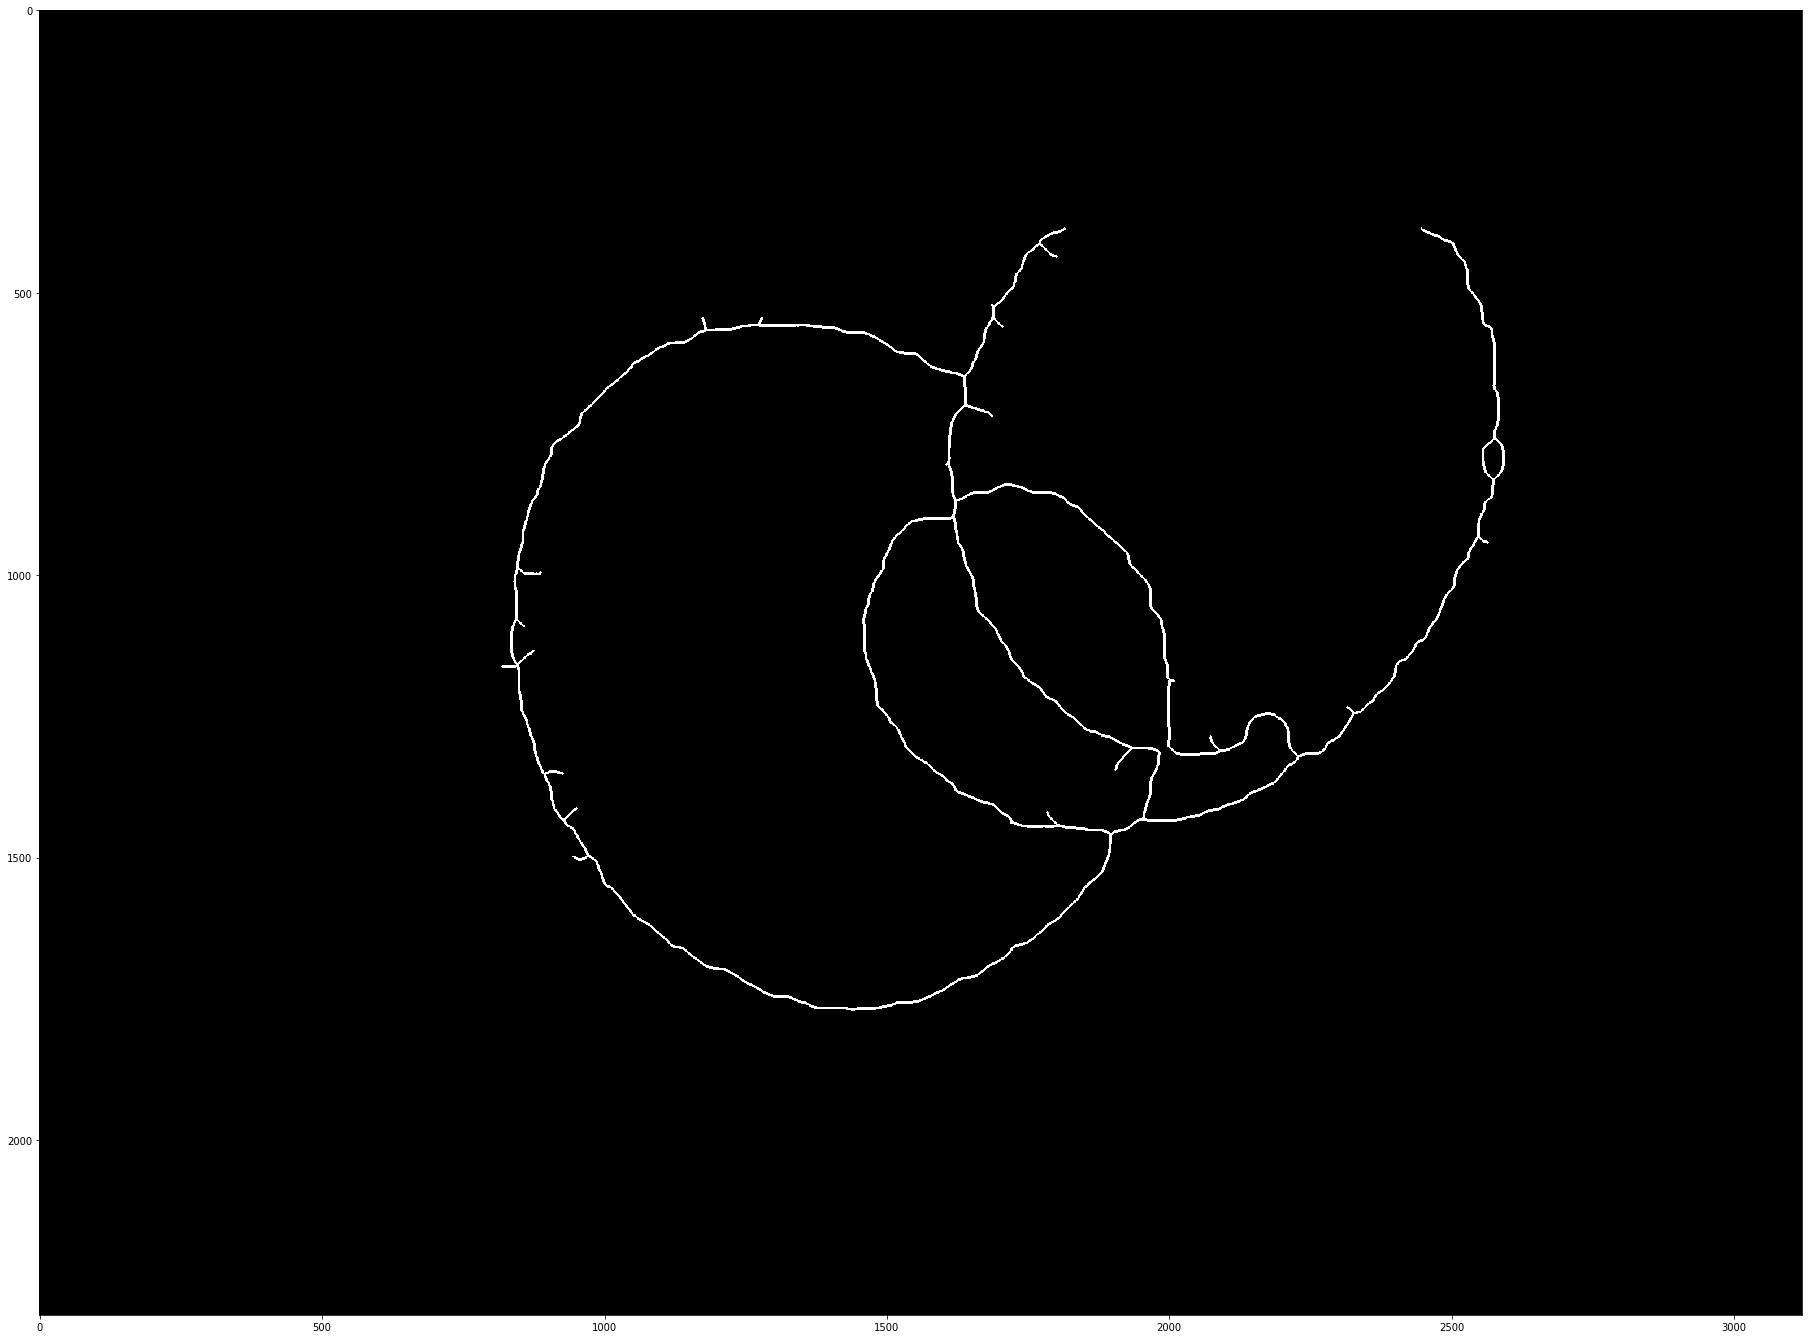

In [92]:
_, contours, hierarchy = cv2.findContours(skeleton.astype(int),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
contours.sort(key=lambda c: cv2.arcLength(c, False), reverse=True)
perimeter = cv2.arcLength(contours[0],False)
print(perimeter)
skelemask = np.zeros(skeleton.shape,np.uint8)
# cv2.drawContours(skelemask,contours,-1,(255,255,255), thickness=-1)
# cv2.drawContours(skelemask,[contours[0]],-1,(255,255,255), thickness=3)
cv2.drawContours(skelemask,contours[:3],-1,(255,255,255), thickness=3)
# cv2.drawContours(skelemask,contours,-1,(255,255,255), thickness=-1)
# cv2.fillPoly(mask, pts=contours[0], color=(255,255,255))
cv2.imwrite('skelemask.png',skelemask)
plt.figure(figsize=(40,24))
plt.imshow(skelemask, cmap='gray')
plt.show()

In [126]:
# contour = np.array([list(i[0]) for i in contours[0]])
# for _ in range(5):
#     contour = subdivide_polygon(contour, degree=2, preserve_ends=True)
# # approximate subdivided polygon with Douglas-Peucker algorithm
# appr = approximate_polygon(contour, tolerance=0.02)

# plt.plot(appr[:,0], appr[:,1])

7201771.0


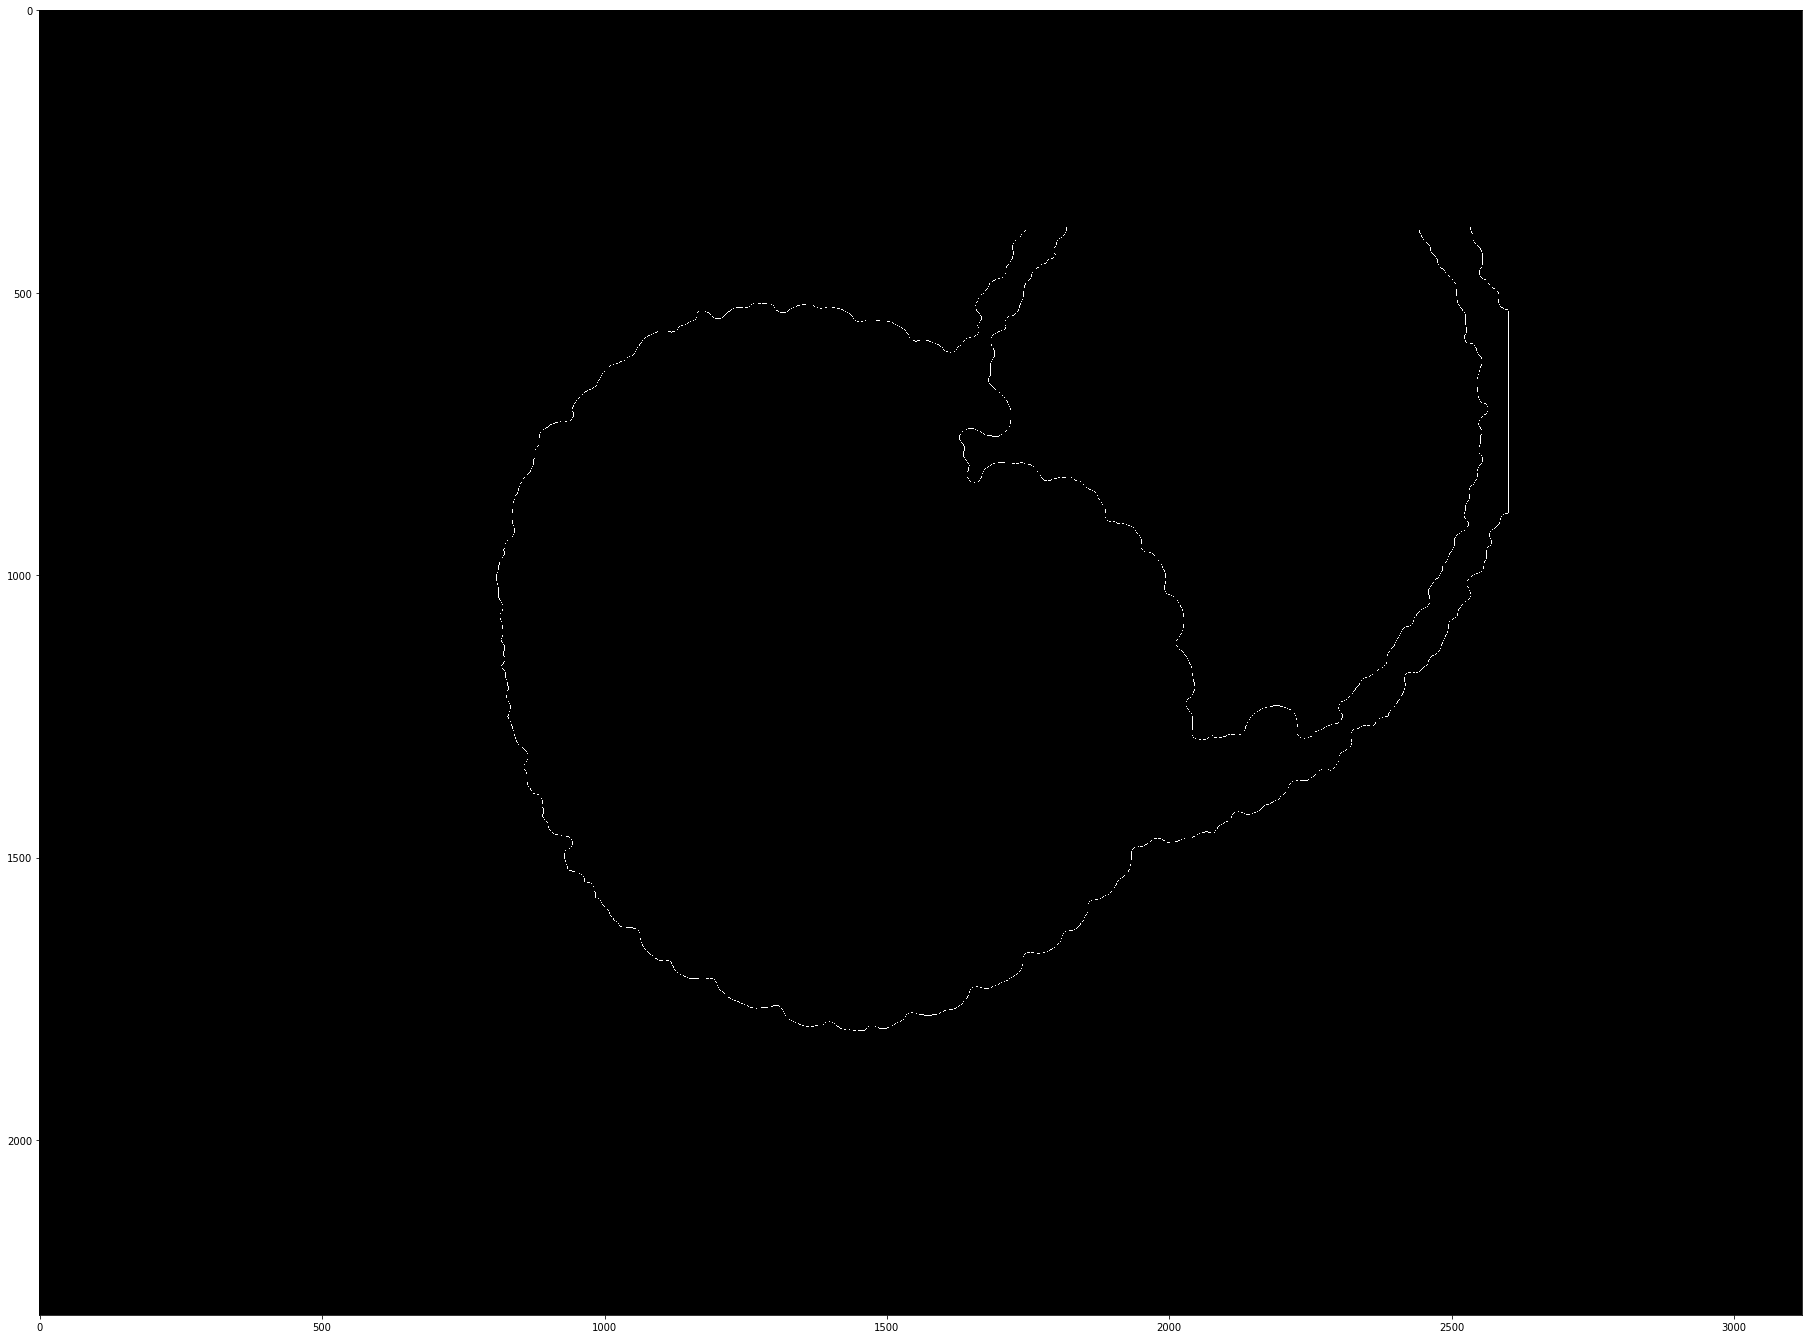

In [127]:
_, contours, hierarchy = cv2.findContours(newimage.astype(int),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
contours.sort(key=cv2.contourArea, reverse=True)
area = cv2.contourArea(contours[0])
print(area)
border = np.zeros(newimage.shape,np.uint8)
# cv2.drawContours(mask,[contours[1]],-1,(255,255,255), thickness=3)
cv2.drawContours(border,[contours[1]],-1,(255,255,255), thickness=1)
# cv2.fillPoly(mask, pts=contours[0], color=(255,255,255))
cv2.imwrite('border.png',border)
plt.figure(figsize=(40,24))
plt.imshow(border, cmap='gray')
plt.show()

In [128]:
width = area/perimeter
print(width)
volume = np.pi * (width/2)*(width/2) * perimeter
print(volume)

543.387078947786
3073537358.404041
